In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv')

In [103]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


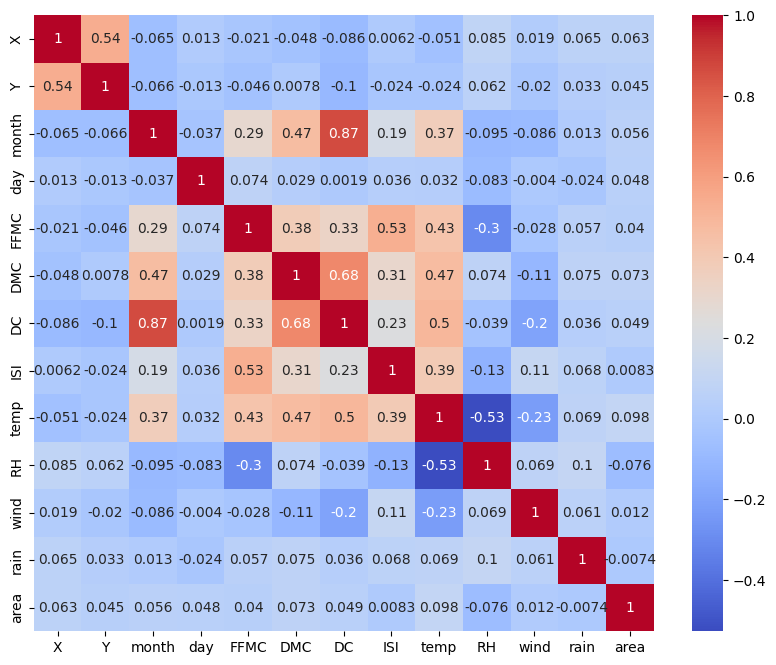

In [104]:
correlation_matrix = df.corr()

# Vẽ heatmap để quan sát
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [105]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Kiểm tra tương quan
correlation_matrix = pd.DataFrame(X_scaled).corr()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
X_final = X_reduced.drop(to_drop, axis=1)

# Tính lại VIF
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print(vif_data)

   Feature        VIF
0        X   7.283100
1        Y  17.699366
2    month  52.026227
3      day   2.823296
4      DMC   9.679111
5       DC  44.591540
6      ISI   6.317996
7     temp  17.097240
8       RH   8.076630
9     wind   6.398748
10    rain   1.027313


In [106]:
# Ngưỡng loại bỏ (có thể điều chỉnh)
threshold = 0.9  

# Tính ma trận tương quan
correlation_matrix = df.corr()

# Lấy danh sách các cặp có tương quan cao
high_corr_features = set()

# Duyệt qua ma trận tương quan để loại bỏ các cột
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Loại bỏ các cột có tương quan cao
print(high_corr_features)
df_reduced = df.drop(columns=high_corr_features)

set()


In [107]:
from sklearn.linear_model import LinearRegression

X = df_reduced.drop('area', axis=1)
y = df_reduced['area']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [108]:
y_pred = model.predict(X)

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R-squared:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R-squared: 0.02535067134925728
MAE: 19.535818523111757
MSE: 3941.70174485466
RMSE: 62.78297336742391


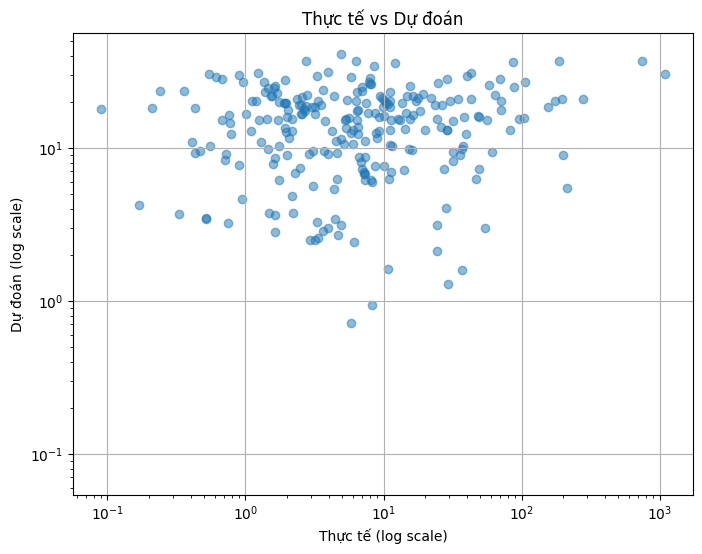

In [110]:
# Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Thực tế (log scale)")
plt.ylabel("Dự đoán (log scale)")
plt.title("Thực tế vs Dự đoán")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Từ biểu đồ trên ta có thể thấy rằng:
1. Phân tán dữ liệu lớn:
Các điểm dữ liệu khá phân tán, cho thấy mô hình đang gặp khó khăn trong việc dự đoán chính xác giá trị area.
Có nhiều điểm dự đoán thấp hơn hoặc cao hơn thực tế, cho thấy mô hình không thể nắm bắt hết các xu hướng của dữ liệu.
2. Dữ liệu lệch và outliers:
Trên thang log-log, một số điểm dữ liệu rất nhỏ hoặc rất lớn cho thấy có sự xuất hiện của các outliers (giá trị ngoại lai). Điều này ảnh hưởng đến hiệu suất của mô hình.
3. R-squared thấp (dự đoán kém):
Mô hình hồi quy tuyến tính thường không hiệu quả trong việc xử lý dữ liệu phi tuyến tính hoặc dữ liệu có sự chênh lệch lớn giữa các giá trị.
